# Homework 10
## Anggara Putra Pratama - 1101174240

## Classifying newswires: a multi - class classification

Please continue the experiment process of "classifying newswires" at https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/3.6-classifying-newswires.ipynb, the current validation accuracy on the reference book is about 81%, try to achieve the validation accuracy above 90%. You can try all possible ways to achieve a validation accuracy of more than 90%.

In [1]:
import keras
keras.__version__

'2.4.3'

## The Reuters dataset

In [2]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

D:\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
D:\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
train_data.shape,len(train_labels), test_data.shape, len(test_labels)

((8982,), 8982, (2246,), 2246)

In [6]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [7]:
max([max(sequence) for sequence in train_data])

9999

In [8]:
word_index = reuters.get_word_index()
num_to_word_map = {num:word for word, num in word_index.items()}

In [9]:
decode_review = ' '.join([num_to_word_map.get(i-3,'?') for i in train_data[5]])
decode_review

"? the u s agriculture department estimated canada's 1986 87 wheat crop at 31 85 mln tonnes vs 31 85 mln tonnes last month it estimated 1985 86 output at 24 25 mln tonnes vs 24 25 mln last month canadian 1986 87 coarse grain production is projected at 27 62 mln tonnes vs 27 62 mln tonnes last month production in 1985 86 is estimated at 24 95 mln tonnes vs 24 95 mln last month canadian wheat exports in 1986 87 are forecast at 19 00 mln tonnes vs 18 00 mln tonnes last month exports in 1985 86 are estimated at 17 71 mln tonnes vs 17 72 mln last month reuter 3"

In [10]:
train_labels[5]

4

In [11]:
# 46 class labels
max(train_labels)

45

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
from collections import Counter
dict(Counter(train_labels)).keys()

dict_keys([3, 4, 16, 19, 8, 21, 11, 1, 13, 20, 18, 25, 35, 9, 38, 10, 28, 2, 6, 12, 7, 30, 34, 15, 14, 32, 41, 40, 45, 23, 42, 26, 24, 37, 27, 31, 39, 0, 22, 33, 36, 17, 43, 29, 44, 5])

# Preparing the data for neural network


In [14]:
import numpy as np
def vectorize_sequence(sequence, dimensions=10000):
    results = np.zeros((len(sequence), dimensions))
    for index,value in enumerate(sequence):
        results[index, value] = 1
    return results
x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [15]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

## Building our network


In [16]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [17]:
# compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

## Validating our approach


In [18]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_val = one_hot_train_labels[1000:]

In [19]:
history = model.fit(partial_x_train, partial_y_val, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 5s 224ms/step - loss: 3.0341 - accuracy: 0.4085 - val_loss: 1.6706 - val_accuracy: 0.6510
Epoch 2/20
16/16 [==============================] - 1s 60ms/step - loss: 1.4648 - accuracy: 0.7029 - val_loss: 1.3197 - val_accuracy: 0.7070
Epoch 3/20
16/16 [==============================] - 1s 73ms/step - loss: 1.0863 - accuracy: 0.7719 - val_loss: 1.1344 - val_accuracy: 0.7650
Epoch 4/20
16/16 [==============================] - 1s 77ms/step - loss: 0.8377 - accuracy: 0.8240 - val_loss: 1.0437 - val_accuracy: 0.7770
Epoch 5/20
16/16 [==============================] - 1s 61ms/step - loss: 0.6670 - accuracy: 0.8587 - val_loss: 0.9913 - val_accuracy: 0.7960
Epoch 6/20
16/16 [==============================] - 1s 67ms/step - loss: 0.5285 - accuracy: 0.8913 - val_loss: 0.9593 - val_accuracy: 0.8060
Epoch 7/20
16/16 [==============================] - 1s 75ms/step - loss: 0.4289 - accuracy: 0.9078 - val_loss: 0.9243 - val_accuracy: 0.8170
Epoch 8/20
1

In [20]:
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

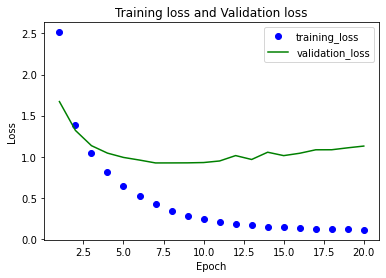

In [21]:
plt.plot(range(1,len(loss)+1), loss, 'bo', label='training_loss')
plt.plot(range(1, len(val_loss)+1), val_loss, 'g', label='validation_loss')
plt.title('Training loss and Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
# what matters for us more is green line.

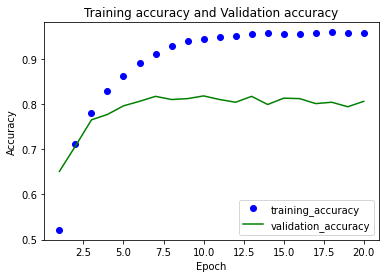

In [22]:
plt.plot(range(1, len(acc)+1), acc, 'bo', label='training_accuracy')
plt.plot(range(1, len(val_acc)+1), val_acc, 'g', label='validation_accuracy')
plt.title('Training accuracy and Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# what matters for us more is green line.

In [23]:
# Since our model is overfitted after epoch 4.
# we'll retrain out for 4 epoch, and will not use validation set this as we don't need validation now.
# i.e validation set is used to find the hyperparameters. and we have found one hyperparameter using val.data (epoch=4)
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer = 'rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, one_hot_train_labels, epochs=9, batch_size=512,validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
18/18 [==============================] - 3s 109ms/step - loss: 3.1325 - accuracy: 0.3908 - val_loss: 1.6074 - val_accuracy: 0.6810
Epoch 2/9
18/18 [==============================] - 1s 68ms/step - loss: 1.4879 - accuracy: 0.7016 - val_loss: 1.0675 - val_accuracy: 0.7770
Epoch 3/9
18/18 [==============================] - 1s 70ms/step - loss: 1.0544 - accuracy: 0.7799 - val_loss: 0.7979 - val_accuracy: 0.8460
Epoch 4/9
18/18 [==============================] - 1s 57ms/step - loss: 0.7966 - accuracy: 0.8353 - val_loss: 0.6204 - val_accuracy: 0.8760
Epoch 5/9
18/18 [==============================] - 1s 57ms/step - loss: 0.6320 - accuracy: 0.8710 - val_loss: 0.4908 - val_accuracy: 0.9070
Epoch 6/9
18/18 [==============================] - 1s 57ms/step - loss: 0.5062 - accuracy: 0.8959 - val_loss: 0.3942 - val_accuracy: 0.9270
Epoch 7/9
18/18 [==============================] - 1s 67ms/step - loss: 0.4134 - accuracy: 0.9150 - val_loss: 0.3028 - val_accuracy: 0.9460
Epoch 8/9
18/18 [==

In [24]:
results

[0.9501240849494934, 0.7951914668083191]

In [25]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels_copy == test_labels)
float(np.sum(hits_array)) / len(test_labels)

0.188780053428317